In [1]:
%run utils.ipynb

In [2]:
%matplotlib notebook

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

In [7]:
def plot_data_frequency_range(data, samples_per_second, sigma=3):
    frequencies, amplitudes = fourier_transform(data, samples_per_second)

    mean = np.mean(amplitudes)
    stdev = np.std(amplitudes)
    threshold = mean + sigma*stdev
    
    max_amplitude = max(amplitudes)
    frequencies = [frequencies[i] for i in range(len(frequencies))]
    amplitudes = [ampl/max_amplitude if ampl >= threshold else 0 for ampl in amplitudes ]
    
    plt.figure()
    plt.plot(frequencies, amplitudes)
    plt.axhline((mean + threshold)/max_amplitude, color='orange', label='Threshold')
    plt.xlim(0, 10_000)
    plt.show()
    
    return frequencies, amplitudes

def plot_frequency_range(input_file, sigma=3):
    samples_per_second, data = wavfile.read(input_file)

    # Extract only 1 channel
    if len(data.shape) == 2:
        data = data[:,0]
    
    # Only process the first second
    data = data[0:44100]
    
    return plot_data_frequency_range(data, samples_per_second, sigma)

<IPython.core.display.Javascript object>


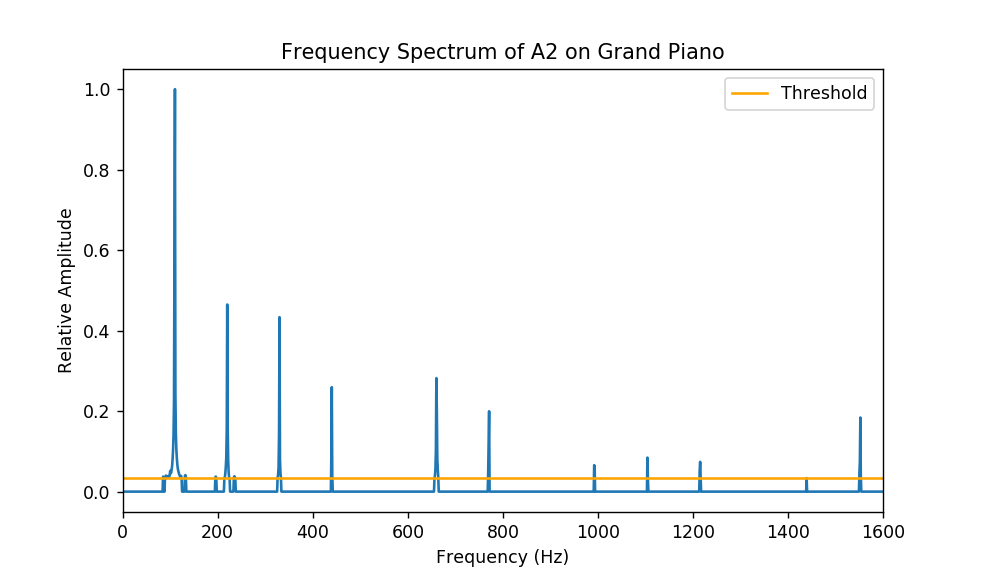

In [10]:
input_file = '../data/SalamanderGrandPiano-FreePats/A2v9.wav'
_ = plot_frequency_range(input_file)
plt.xlim(0, 1600)
plt.title('Frequency Spectrum of A2 on Grand Piano')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Relative Amplitude')
plt.legend()

<IPython.core.display.Javascript object>


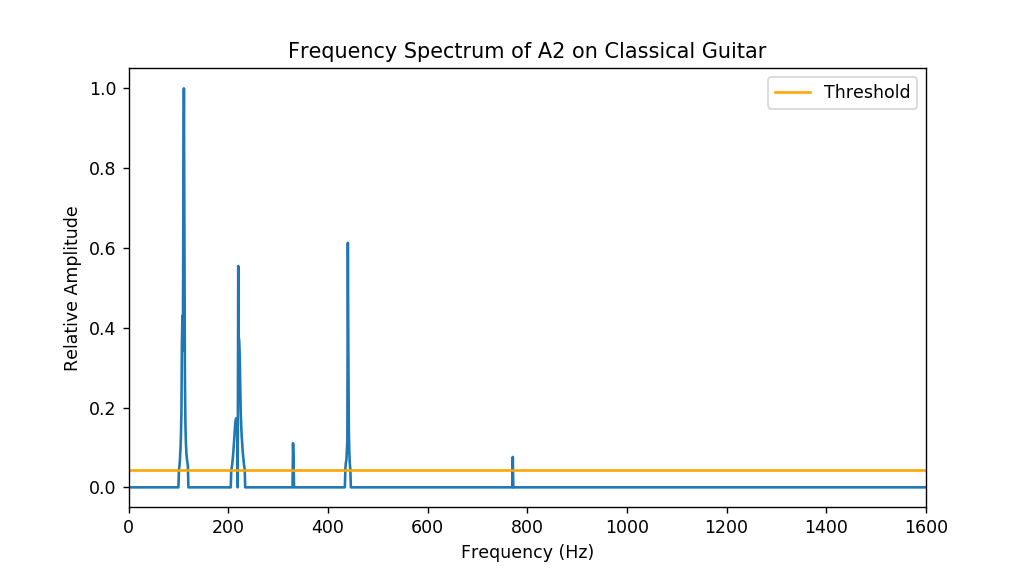

In [11]:
input_file = '../data/SpanishClassicalGuitar-FreePats/A2.wav'
_ = plot_frequency_range('../data/SpanishClassicalGuitar-FreePats/A2.wav')
plt.xlim(0, 1600)
plt.title('Frequency Spectrum of A2 on Classical Guitar')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Relative Amplitude')
plt.legend()